In [1]:
import numpy as np
import pandas as pd
pd.options.mode.use_inf_as_na = True
from scipy.stats import ttest_ind
#import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
raw = pd.read_csv('Scorecard_Final.csv', low_memory=False)
#source https://www.kaggle.com/kaggle/college-scorecard/home
#each row in this dataset is a branch of a higher education institution. The data comes from the US Dept of Education Scorecard 
#and has been filtered down to the collected data that pertains to debt and earnings potential from 2003-2013.

In [3]:
raw.shape

(72032, 41)

Total Institutions in population: 9091
CONTROL             relig    
Private for-profit  Secular      4655
Public              Secular      2285
Private nonprofit   Secular      2258
                    Religious     917
Name: UNITID, dtype: int64


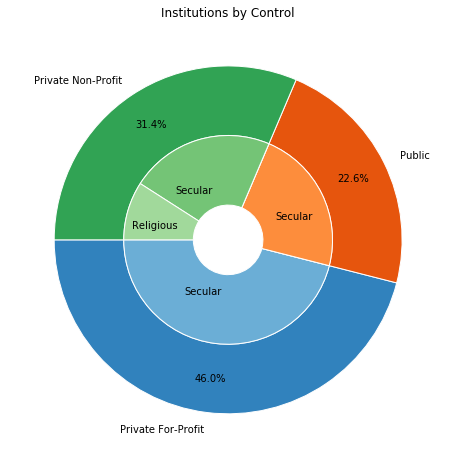

In [5]:
#How many of these institutions are under private vs public control, and how many are religious?
print("Total Institutions in population: " + str(raw['UNITID'].nunique()))

raw['relig'] = np.where(raw['RELAFFIL'] == 'None', 'Secular', 'Religious')

control = raw.groupby(['CONTROL', 'relig'])['UNITID'].nunique()
print(control.sort_values(ascending=False))


##DONUT CHART TO SHOW THE BREAKDOWN

fig, ax = plt.subplots(figsize=(8, 8))

size = 0.4
vals = np.array([[4655,0], [2285,0], [2258,917]])
stan = 180
#set colors such that the parent and child groups will appear similar:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Private For-Profit', 'Public', 'Private Non-Profit'], startangle=stan, autopct='%1.1f%%', pctdistance=.8)

ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['Secular', '', 'Secular', '', 'Secular', 'Religious'], labeldistance=0.5, rotatelabels=False, startangle=stan)

ax.set(aspect="equal", title='Institutions by Control')
plt.show()


In [6]:
#Religious Affiliation?
rel = raw.groupby('RELAFFIL')['UNITID'].nunique()
rel.sort_values(ascending=False).head(10)



RELAFFIL
None                           9084
Roman Catholic                  253
United Methodist                 95
Baptist                          72
Presbyterian Church (USA)        57
Interdenominational              36
Jewish                           36
Evangelical Lutheran Church      31
Other Protestant                 24
Southern Baptist                 23
Name: UNITID, dtype: int64

In [7]:
#Region?
regions = raw.groupby('region')['UNITID'].nunique()
regions.sort_values(ascending=False)

region
Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)    2257
Mid East (DE, DC, MD, NJ, NY, PA)                             1386
Great Lakes (IL, IN, MI, OH, WI)                              1356
Far West (AK, CA, HI, NV, OR, WA)                             1322
Southwest (AZ, NM, OK, TX)                                     949
Plains (IA, KS, MN, MO, NE, ND, SD)                            779
New England (CT, ME, MA, NH, RI, VT)                           514
Rocky Mountains (CO, ID, MT, UT, WY)                           346
Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)                192
U.S. Service Schools                                             1
Name: UNITID, dtype: int64

Text(0.5,1,'Institutions by Purpose')

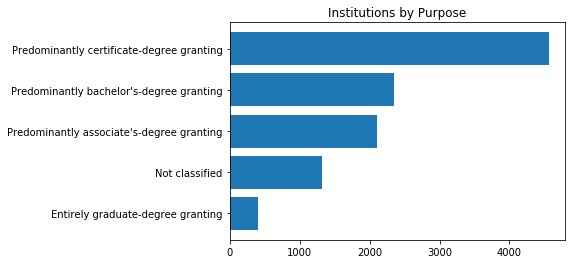

In [8]:
#Predominant Degree
preDeg = raw.groupby('PREDDEG')['UNITID'].nunique()
preDeg.sort_values(ascending=False)

plt.barh(preDeg.keys(),preDeg.values)
plt.title('Institutions by Purpose')

In [9]:
#How many are still operating as of the data's publication?
op = raw.groupby('CURROPER')['UNITID'].nunique()
op.sort_values(ascending=False)

CURROPER
True     7719
False    1990
Name: UNITID, dtype: int64

In [10]:
#Let's isolate the 2013 data to do some further exploration

yr13net = raw[raw['Year'] == 2013]
yr13net.shape


(7804, 42)

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pand

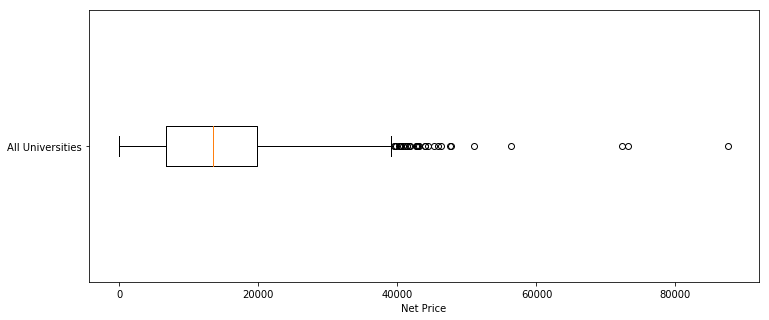

In [11]:
#What's the Total net price box & whisker look like?
yr13net['NPT4_PUB'].fillna(0, inplace=True)
yr13net['NPT4_PRIV'].fillna(0.0, inplace=True)
yr13net['netp'] = yr13net['NPT4_PUB'] + yr13net['NPT4_PRIV']
#None should be negative. Are there any?
#print(yr13net['netp'][yr13net.netp < 0].count())
#raise those to zero
yr13net['netp'][yr13net.netp < 0] = 0
#check
#print(yr13net['netp'][yr13net.netp < 0].count())


plt.figure(figsize=(12,5))
plt.boxplot(yr13net.netp, vert=False, labels=['All Universities'])
plt.xlabel('Net Price')
plt.show()


In [12]:
yr13net[['INSTNM','netp']][yr13net.netp > 55000]

,INSTNM,netp
65924,Hallmark Institute of Photography,73183.0
66709,The International Culinary Center,56287.0
69439,Aerosim Flight Academy,87570.0
70184,Aviator College of Aeronautical Science and Te...,72265.0


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

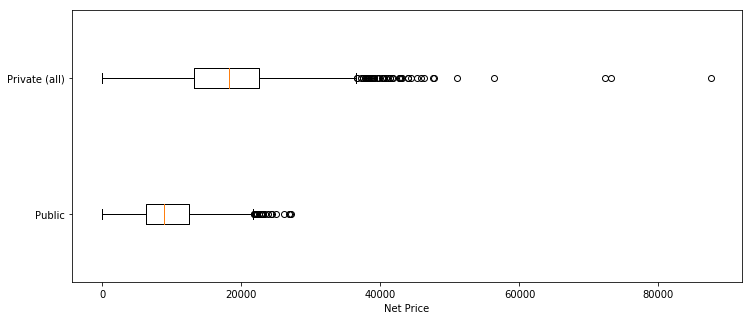

In [13]:
#What if we split between public and private schools? I need to repull from raw to undo the "fillna" operations.
yr13 = raw[raw['Year'] == 2013]
yr13Pub = yr13[np.isnan(yr13.NPT4_PUB) == False]
yr13Priv = yr13[np.isnan(yr13.NPT4_PRIV) == False]

#change negative values to zero
yr13Pub['NPT4_PUB'][yr13Pub.NPT4_PUB < 0] = 0
yr13Priv['NPT4_PRIV'][yr13Priv.NPT4_PRIV < 0] = 0


plt.figure(figsize=(12,5))
plt.boxplot([yr13Pub.NPT4_PUB,yr13Priv.NPT4_PRIV], labels=['Public','Private (all)'], vert=False)
plt.xlabel('Net Price')
plt.show()


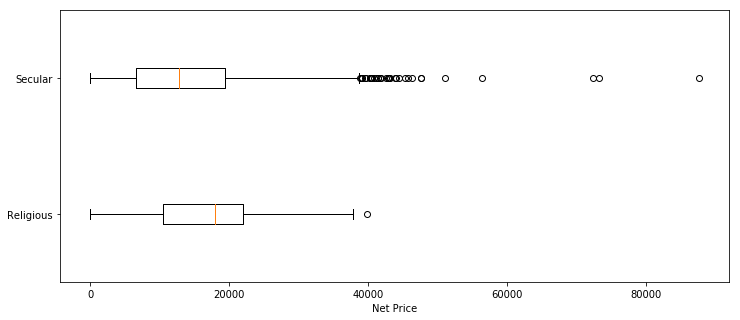

In [14]:
#Religious vs non-religious?
#yr13net.loc[:,'rel'] = yr13['RELAFFIL'] != "None"
yr13net = yr13net.assign(rel = yr13['RELAFFIL'] != "None")
yr13Rel = yr13net[yr13net.rel == True]
yr13NonRel = yr13net[yr13net.rel == False]


plt.figure(figsize=(12,5))
plt.boxplot([yr13Rel.netp,yr13NonRel.netp], labels=['Religious','Secular'], vert=False)
plt.xlabel('Net Price')
plt.show()

In [15]:
#create a df with only the rows that have values for the 
#median debt upon the start of repayment

debt = raw[(np.isnan(raw.DEBT_MDN) == False) & (np.isnan(raw.DEBT_N) == False)]


[Text(0,0.5,'Median Debt of Separating Student')]

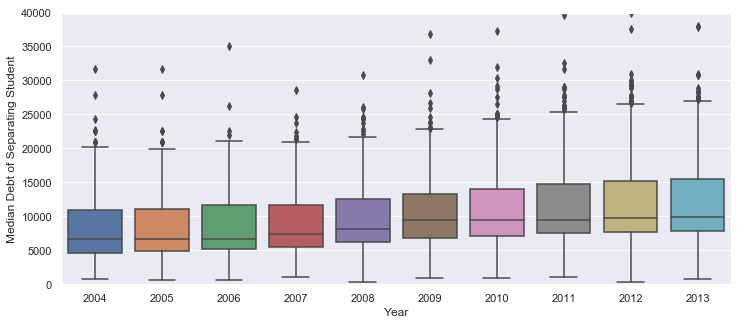

In [16]:
#range of debt values by year, cutting off extreme outliers for readability
sns.set(style="darkgrid")
plt.figure(figsize=(12,5))
plt.ylim(0, 40000)

ax = sns.boxplot(y='DEBT_MDN', x='Year', data=debt)
ax.set(ylabel='Median Debt of Separating Student')
#Clearly there's an upward trend in the debt students are graduating with.

In [18]:
#Create seperate dataframes with each "genre" of columns, to look for correlations between them.
#degreeTypes = raw[['Id','PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP49', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54']]
#deaths = raw[['Id', 'DEATH_YR2_RT', 'LO_INC_DEATH_YR2_RT', 'MD_INC_DEATH_YR2_RT', 'HI_INC_DEATH_YR2_RT', 'DEP_DEATH_YR2_RT', 'IND_DEATH_YR2_RT', 'FEMALE_DEATH_YR2_RT', 'MALE_DEATH_YR2_RT', 'PELL_DEATH_YR2_RT', 'NOPELL_DEATH_YR2_RT', 'LOAN_DEATH_YR2_RT', 'NOLOAN_DEATH_YR2_RT', 'FIRSTGEN_DEATH_YR2_RT', 'NOT1STGEN_DEATH_YR2_RT', 'DEATH_YR3_RT', 'LO_INC_DEATH_YR3_RT', 'MD_INC_DEATH_YR3_RT', 'HI_INC_DEATH_YR3_RT', 'DEP_DEATH_YR3_RT', 'IND_DEATH_YR3_RT', 'FEMALE_DEATH_YR3_RT', 'MALE_DEATH_YR3_RT', 'PELL_DEATH_YR3_RT', 'NOPELL_DEATH_YR3_RT', 'LOAN_DEATH_YR3_RT', 'NOLOAN_DEATH_YR3_RT', 'FIRSTGEN_DEATH_YR3_RT', 'NOT1STGEN_DEATH_YR3_RT', 'DEATH_YR4_RT', 'LO_INC_DEATH_YR4_RT', 'MD_INC_DEATH_YR4_RT', 'HI_INC_DEATH_YR4_RT', 'DEP_DEATH_YR4_RT', 'IND_DEATH_YR4_RT', 'FEMALE_DEATH_YR4_RT', 'PELL_DEATH_YR4_RT', 'NOPELL_DEATH_YR4_RT', 'LOAN_DEATH_YR4_RT', 'NOLOAN_DEATH_YR4_RT', 'FIRSTGEN_DEATH_YR4_RT', 'NOT1STGEN_DEATH_YR4_RT', 'DEATH_YR6_RT', 'LO_INC_DEATH_YR6_RT', 'MD_INC_DEATH_YR6_RT', 'HI_INC_DEATH_YR6_RT', 'DEP_DEATH_YR6_RT', 'IND_DEATH_YR6_RT', 'FEMALE_DEATH_YR6_RT', 'MALE_DEATH_YR6_RT', 'PELL_DEATH_YR6_RT', 'NOPELL_DEATH_YR6_RT', 'LOAN_DEATH_YR6_RT', 'NOLOAN_DEATH_YR6_RT', 'FIRSTGEN_DEATH_YR6_RT', 'NOT1STGEN_DEATH_YR6_RT', 'DEATH_YR8_RT', 'LO_INC_DEATH_YR8_RT', 'MD_INC_DEATH_YR8_RT', 'HI_INC_DEATH_YR8_RT', 'DEP_DEATH_YR8_RT', 'IND_DEATH_YR8_RT', 'FEMALE_DEATH_YR8_RT', 'MALE_DEATH_YR8_RT', 'PELL_DEATH_YR8_RT', 'NOPELL_DEATH_YR8_RT', 'LOAN_DEATH_YR8_RT', 'NOLOAN_DEATH_YR8_RT', 'FIRSTGEN_DEATH_YR8_RT', 'NOT1STGEN_DEATH_YR8_RT']]
#debtMed = raw[['Id', 'DEBT_MDN', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'LO_INC_DEBT_MDN', 'MD_INC_DEBT_MDN', 'HI_INC_DEBT_MDN', 'DEP_DEBT_MDN', 'IND_DEBT_MDN', 'FEMALE_DEBT_MDN', 'MALE_DEBT_MDN', 'FIRSTGEN_DEBT_MDN', 'NOTFIRSTGEN_DEBT_MDN']]
debtDemo = raw[['Id', 'DEBT_N', 'GRAD_DEBT_N', 'WDRAW_DEBT_N', 'LO_INC_DEBT_N', 'MD_INC_DEBT_N', 'HI_INC_DEBT_N', 'DEP_DEBT_N', 'IND_DEBT_N', 'PELL_DEBT_N', 'NOPELL_DEBT_N', 'FEMALE_DEBT_N', 'MALE_DEBT_N', 'FIRSTGEN_DEBT_N', 'NOTFIRSTGEN_DEBT_N']]
#repay = raw[['Id', 'LO_INC_RPY_1YR_N', 'MD_INC_RPY_1YR_N', 'HI_INC_RPY_1YR_N', 'FIRSTGEN_RPY_1YR_N', 'NOTFIRSTGEN_RPY_1YR_N', 'RPY_3YR_N', 'LO_INC_RPY_3YR_N', 'MD_INC_RPY_3YR_N', 'HI_INC_RPY_3YR_N', 'FIRSTGEN_RPY_3YR_N', 'NOTFIRSTGEN_RPY_3YR_N', 'RPY_5YR_N', 'LO_INC_RPY_5YR_N', 'MD_INC_RPY_5YR_N', 'HI_INC_RPY_5YR_N', 'FIRSTGEN_RPY_5YR_N', 'NOTFIRSTGEN_RPY_5YR_N', 'RPY_7YR_N', 'LO_INC_RPY_7YR_N', 'MD_INC_RPY_7YR_N', 'HI_INC_RPY_7YR_N', 'FIRSTGEN_RPY_7YR_N', 'NOTFIRSTGEN_RPY_7YR_N']]
#earnings = raw[['Id', 'count_nwne_p6', 'count_wne_p6', 'mn_earn_wne_p6', 'md_earn_wne_p6', 'sd_earn_wne_p6', 'count_wne_inc1_p6', 'count_wne_inc2_p6', 'count_wne_inc3_p6', 'gt_25k_p6', 'mn_earn_wne_inc1_p6', 'mn_earn_wne_inc2_p6', 'mn_earn_wne_inc3_p6']]

In [ ]:
#What connections can be made with student loans?
#debtByDegree = debtMed.corrwith(degreeTypes)

result = pd.concat([earnings, repay], axis=1).corr()
#corr_full = full_train.corr()
mask = np.zeros_like(result) 
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(25,10))
with sns.axes_style('darkgrid'):    
    sns.heatmap(result.abs(), mask=mask, cmap='PRGn_r')

In [ ]:
indices = np.where(corr<-0.7)
indices = [(corr.columns[x],corr.columns[y]) for x,y in zip(*indices) if x != y and x<y]
indices = pd.DataFrame(indices)
indices.to_csv('indices.csv')
indices.head()
#After examining this enormous list in the csv file, none of these relationships are meaningful because
#They are all extremely similar statistics. EX - the death rate of males is correlated with the overall
#death rate, or the net price is correlated with the average cost - these are tautologies

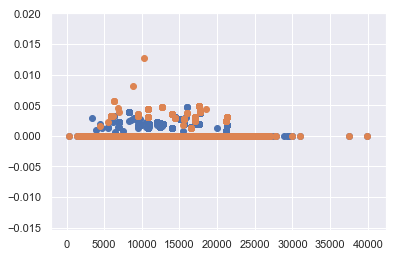

In [19]:
#Does the median debt values recorded in 2012 correlate with death rate?
debt12Death = debt[(debt.Year == 2012) & (np.isnan(debt.DEATH_YR2_RT) == False)]
debt12Death_sub = debt12Death[['DEBT_MDN','DEATH_YR2_RT']]


plt.scatter(debt12Death_sub.DEBT_MDN,debt12Death_sub.DEATH_YR2_RT)
plt.scatter(debt12Death.DEBT_MDN,debt12Death.DEATH_YR8_RT)
plt.show()


#Death as recorded within 2 and 8 years:

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


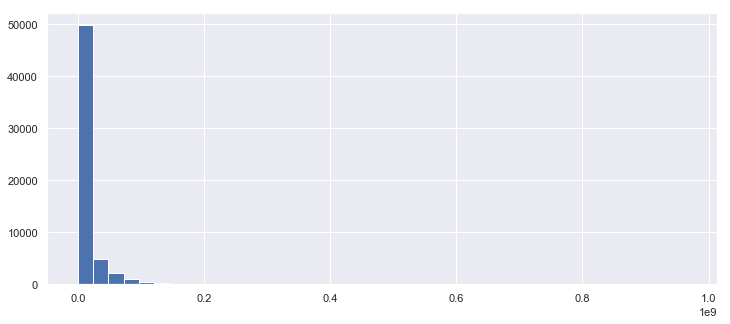

In [20]:
#Is debt correlated with _?

debt['studNum'] = debt['DEBT_N'] / debt['NUMBRANCH']

debt['totalDebtForBranch'] = debt['DEBT_MDN'] * debt['studNum']

#plt.hist(debt[debt.stud_num < 8000]['stud_num'], bins=40)
plt.figure(figsize=(12,5))
#plt.hist(debt[debt.totalDebtForRow < 500000]['totalDebtForRow'])
plt.hist(debt['totalDebtForBranch'], bins=40)
plt.show()



#Limitation this has made me realize - it looks like some of the schools with multiple branches reported only in aggreggate, 
#so assumptons were made (evenly divide between known campuses)

In [ ]:
nullvals = earnings.isnull().sum(axis=0).reset_index()
nullvals.columns = ['features','null_valcnt']
nullvals.sort_values(by ='null_valcnt',ascending = False, inplace=True)
nullvals

In [ ]:
fig, axes = plt.subplots(figsize=(18,5))
axes.bar(np.arange(nullvals.shape[0]), nullvals.null_valcnt.values/1000.0, width = 0.3, color='green',)
axes.set_title('Count of nulls values for every feature in the train data in 1000s',fontsize=14)
axes.set_xticks(np.arange(len(nullvals.features)))
axes.set_xticklabels(nullvals.features, rotation='vertical',color='purple')
axes.set_yticks(np.array([0,10,20,30,40,50,60,70,80,90,100]))
plt.show()

# Remove highly correlated columns describing the same thing
remove majority empty columns that aren't sufficient for drawing conclusions


add notes around preprocessing


Preprocessing notes:
* Name changes in school required manual consolidation for summaries by names to be functional
* Count of students appears to have been done at the parent level for universities with multiple branches, but each branch was assigned the total. I divided this number by # of branches to achieve a true cohort count.

In [21]:
debt['malePCT'] = debt['MALE_DEBT_N'] / (debt['MALE_DEBT_N'] + debt['FEMALE_DEBT_N'])
debt['femalePCT'] = 1 - debt['malePCT']

debt['firstGenPCT'] = debt['FIRSTGEN_DEBT_N'] / (debt['FIRSTGEN_DEBT_N'] + debt['NOTFIRSTGEN_DEBT_N'])
debt['notFirstGenPCT'] = 1 - debt['firstGenPCT']

debt['hiIncPCT'] = debt['HI_INC_DEBT_N'] / (debt['HI_INC_DEBT_N'] + debt['MD_INC_DEBT_N'] + debt['LO_INC_DEBT_N'])
debt['medIncPCT'] = debt['MD_INC_DEBT_N'] / (debt['HI_INC_DEBT_N'] + debt['MD_INC_DEBT_N'] + debt['LO_INC_DEBT_N'])
debt['lowIncPCT'] = debt['LO_INC_DEBT_N'] / (debt['HI_INC_DEBT_N'] + debt['MD_INC_DEBT_N'] + debt['LO_INC_DEBT_N'])


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [22]:
#Isolate the columns I need to speed this up
debtAnalysis= debt[['UNITID', 'studNum', 'totalDebtForBranch', 'malePCT', 'femalePCT', 'firstGenPCT', 'notFirstGenPCT', 'hiIncPCT', 'medIncPCT', 'lowIncPCT']]


In [23]:
debtAnalysis.describe().to_csv('describe.csv')

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the 

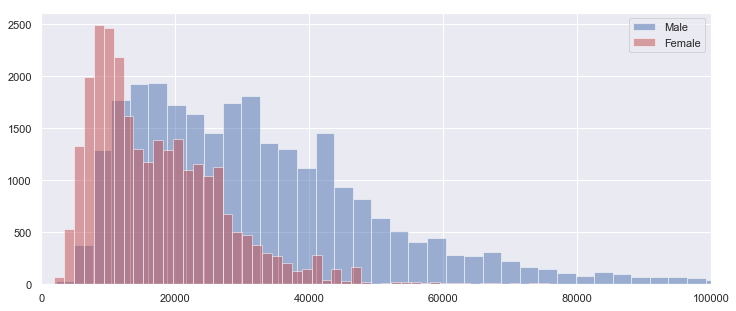

Ttest_indResult(statistic=64.2675473803397, pvalue=0.0)


In [25]:
##GENDER
debtAnalysis['maleAvgDebt'] = debtAnalysis['totalDebtForBranch'] / (debt['studNum'] * debt['malePCT'])
debtAnalysis['femaleAvgDebt'] = debtAnalysis['totalDebtForBranch'] / (debt['studNum'] * debt['femalePCT'])

#Remove inf and NA's
genderAnalysis = debtAnalysis[(np.isnan(debtAnalysis.maleAvgDebt) == False) & (np.isnan(debtAnalysis.femaleAvgDebt) == False)]
genderAnalysis.dropna(how='any', inplace=True)

plt.figure(figsize=(12,5))
plt.hist(genderAnalysis['maleAvgDebt'], bins=400, label='Male', alpha=.5, color='b')
plt.hist(genderAnalysis['femaleAvgDebt'], bins=400, label='Female', alpha=.5, color='r')
plt.xlim(0,100000)
plt.legend()
plt.show()

print(ttest_ind(genderAnalysis.maleAvgDebt, genderAnalysis.femaleAvgDebt, equal_var=False))

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

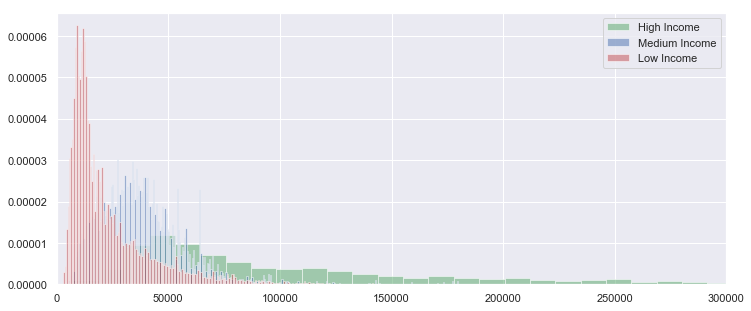

Ttest_indResult(statistic=98.4388736520915, pvalue=0.0)
Ttest_indResult(statistic=86.4269442333829, pvalue=0.0)


In [24]:
##Income
debtAnalysis['hiIncAvgDebt'] = debtAnalysis['totalDebtForBranch'] / (debt['studNum'] * debt['hiIncPCT'])
debtAnalysis['medIncAvgDebt'] = debtAnalysis['totalDebtForBranch'] / (debt['studNum'] * debt['medIncPCT'])
debtAnalysis['lowIncAvgDebt'] = debtAnalysis['totalDebtForBranch'] / (debt['studNum'] * debt['lowIncPCT'])


#Remove inf and NA's
incomeAnalysis = debtAnalysis[(np.isnan(debtAnalysis.hiIncAvgDebt) == False) & (np.isnan(debtAnalysis.medIncAvgDebt) == False)  & (np.isnan(debtAnalysis.lowIncAvgDebt) == False)]
incomeAnalysis.dropna(how='any', inplace=True)

plt.figure(figsize=(12,5))
plt.hist(incomeAnalysis['hiIncAvgDebt'], bins=400, label='High Income', alpha=.5, color='g', density=True)
plt.hist(incomeAnalysis['medIncAvgDebt'], bins=400, label='Medium Income', alpha=.5, color='b', density=True)
plt.hist(incomeAnalysis['lowIncAvgDebt'], bins=400, label='Low Income', alpha=.5, color='r', density=True)
plt.xlim(0,300000)
plt.legend()
plt.show()

print(ttest_ind(incomeAnalysis.hiIncAvgDebt, incomeAnalysis.medIncAvgDebt, equal_var=False))
print(ttest_ind(incomeAnalysis.medIncAvgDebt, incomeAnalysis.lowIncAvgDebt, equal_var=False))

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

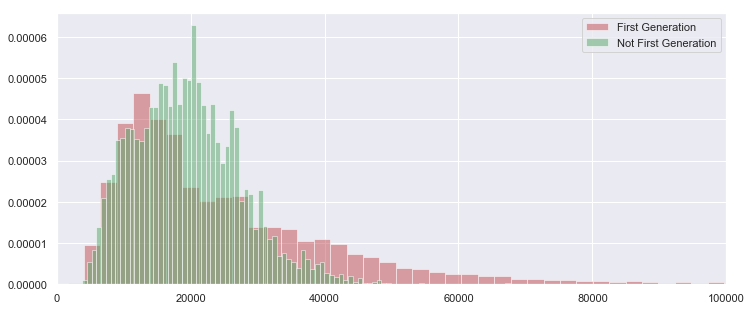

Ttest_indResult(statistic=48.572537367862246, pvalue=0.0)


In [25]:
##First Generation
debtAnalysis['firstGenAvgDebt'] = debtAnalysis['totalDebtForBranch'] / (debt['studNum'] * debt['firstGenPCT'])
debtAnalysis['notFirstGenAvgDebt'] = debtAnalysis['totalDebtForBranch'] / (debt['studNum'] * debt['notFirstGenPCT'])

#Remove inf and NA's
generationAnalysis = debtAnalysis[(np.isnan(debtAnalysis.firstGenAvgDebt) == False) & (np.isnan(debtAnalysis.firstGenAvgDebt) == False)]
generationAnalysis.dropna(how='any', inplace=True)

plt.figure(figsize=(12,5))
plt.hist(generationAnalysis['firstGenAvgDebt'], bins=100, label='First Generation', alpha=.5, color='r', density=True)
plt.hist(generationAnalysis['notFirstGenAvgDebt'], bins=100, label='Not First Generation', alpha=.5, color='g', density=True)
plt.xlim(0,100000)
plt.legend()
plt.show()

print(ttest_ind(generationAnalysis.firstGenAvgDebt, generationAnalysis.notFirstGenAvgDebt, equal_var=False))

In [26]:
print(generationAnalysis['firstGenAvgDebt'].median())

19452.831829368337


In [27]:
print(generationAnalysis['notFirstGenAvgDebt'].median())

19062.30656934307
